# Convergence of Sequences

Pablo Winant

# Tutorial: Convergence

### Solow Model

A representative agent uses capital $k_t$ to produce $y_t$ using the
following production function:

$$y_t = k_t^{\alpha}$$

He chooses to consume an amount $c_t \in ]0, y_t]$ and invests what
remains:

$$i_t = y_t - c_t$$

He accumulates capital $k_t$ according to:

$$k_{t+1} = \left( 1-\delta \right) k_{t} + i_{t}$$

where $\delta$ is the depreciation rate and $i_t$ is the amount
invested.

The goal of the representative agent is to maximize:

$$\sum_{t\geq 0} \beta^t U(c_t)$$

where $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ and $\beta<1$ is the discount
factor.

For now, we ignore the objective and assume that the saving rate
$s=\frac{c_t}{y_t}$ is constant over time. (1-s plutôt ?)

**Create a `NamedTuple` to hold parameter values $\beta=0.96$,
$\delta=0.1$, $\alpha=0.3$, $\gamma=4$.**

**Write down the formula of function $f$ such that $k_{t+1}$:
$k_{t+1} = f(k_t)$.**

**Define a function `f(k::Float64, p::NamedTuple)::Float64` to represent
$f$ for a given calibration**

In [15]:
using Plots

In [16]:
model = (α=0.3, β=0.96, δ=0.1, γ=4)
# model_2 = merge(model, (;α=0.4)) to create new model

# syntax to "unpack" values from named tuple : 
# (;α, β, δ, γ) = model

(α = 0.3, β = 0.96, δ = 0.1, γ = 4)

$ f(k_t) :: k_{t+1} = (1-\delta)k_t + s.k_{t}^{\alpha} $ (S= (1-s) de l'énoncé)

In [5]:
function f(k, model; s=0.3)

    (;α, β, δ, γ) = model
    y = k^α
    i = s*y
    K = (1-δ)*k + i

    return K
end

function df(k, model; s=0.3)

    (;α, β, δ, γ) = model
    return (1-δ)
end

f (generic function with 1 method)

In [8]:
f(0.5, model)
#f(0.5, model; s=0.4)

0.6936757189068706

**Write a function
`simulate(k0::Float64, T::Int, p::NamedTuple)::Vector{Float64}` to
compute the simulation over `T` periods starting from initial capital
level `k0`.**

In [13]:
function simulate(k0, model; s=0.4, T=100)
    res = [k0]
    for t=1:T
        k = res[end]
        K = f(k, model; s=s)
        push!(res, K)
    end
    return res
end

simulate (generic function with 1 method)

In [14]:
simulate(0.5, model)

101-element Vector{Float64}:
 0.5
 0.7749009585424942
 1.0679497992469396
 1.3691220146661789
 1.6717439771875893
 1.9712406953317936
 2.2644391998184954
 2.5491450744662236
 2.8238676158995952
 3.087632556067258
 ⋮
 7.234413529429885
 7.235209646662481
 7.2359500610507625
 7.236638668366576
 7.23727909214093
 7.237874702658239
 7.238428634629446
 7.238943803635337
 7.2394229214251595

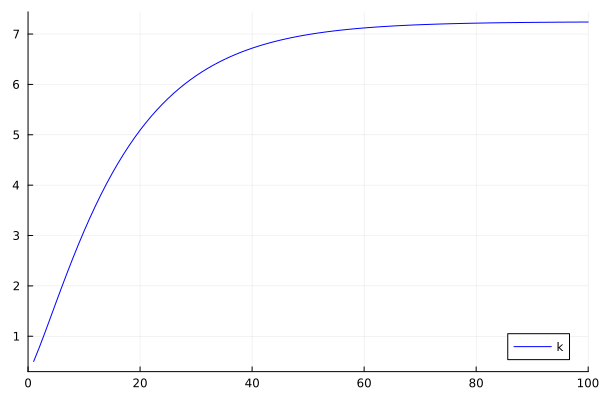

In [25]:
fig = plot(xlim=(0,100), legend=:bottomright)
plot!(fig, simulate(0.5, model; T=100), c=:blue, label="k")

**Make a nice plot to illustrate the convergence. Do we get convergence
from any initial level of capital?**

**Suppose you were interested in using `f` to compute the steady-state.
What would you propose to measure convergence speed? To speed-up
convergence? Implement these ideas.**

Speed up the convergence using Newton's method applied to $\Phi(x) = f(x) - x$

$$k_{n+1} = k_{n} - \frac{f(k_n) - k_n}{f'(k_n)-1}$$

In [ ]:
function simulate_newton(k0, model; s=0.4, T=100)
    res = [k0]
    resN = [k0]
    for t=1:T
        k = res[end]
        K = f(k, model; s=s)
        KN = 
        push!(res, K)
    end
    return res
end

In [24]:
# Julia REPL
# ] for packages
# ; for shell

# Finir exo 
# Prendre notes sur slides